# HOMEWORK 2

## 1 A Simplified Decision Tree

In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import copy

#calculate the entropy value of a set of data according to the labels
def entropy(classes):
    classes = np.array(classes)
    n = len(classes)
    count0 = sum(classes == 0)
    count1 = sum(classes == 1)
    #all of the classes are same
    #print(classes, count0, count1)
    if (count0 == n) or (count1 == n):
        return 0
    #compute the entropy value
    entropy_value = -(count0 / n) * np.log2(count0 / n) -(count1 / n) * np.log2(count1 / n)
    return entropy_value

def intrinsic(values):
    n = len(values)
    value_dict = Counter(values)
    intrinsic_value = sum([- (count / n) * np.log2(count / n)  
                           for count in value_dict.values()])
    return intrinsic_value

#split the data according to a feature and the threshold, return the infomation gain ratio,
# and the splitted datas
def entropy_gain(data, feature, c, classes):
    origin_entropy = entropy(classes)
    n = len(classes)
    classesL = classes[data[:, feature] < c]
    dataL = data[data[:, feature] < c]
    nL = len(classesL)
    classesR = classes[data[:, feature] >= c]
    dataR = data[data[:, feature] >= c]
    nR = len(classesR)
    entropyL = entropy(classesL)
    entropyR = entropy(classesR)
    info_gain = origin_entropy - (nL / n) * entropyL - (nR / n) * entropyR
    intrinsic_value = intrinsic(data[:, feature])
    info_gain_ratio = info_gain / intrinsic_value
    return info_gain_ratio, info_gain, dataL, dataR, classesL, classesR


def split(data, classes, preRule=''):
    if sum(classes == 0) > sum(classes == 1):
        majority_class = 0
    else:
        majority_class = 1
        
    if entropy(classes) == 0:
        return preRule + f': predict={majority_class}'
    
    best_gain_ratio = -1
    for feature in [0, 1]:
        if len(set(data[:, feature])) > 1:
            for c in set(data[:, feature]):
                if c == min(data[:, feature]):
                    continue
                info_gain_ratio, info_gain, dataL, dataR, classesL, classesR = entropy_gain(data, feature, c, classes)
                if info_gain_ratio > best_gain_ratio:
                    best_gain_ratio = info_gain_ratio
                    best_feature = feature
                    best_c = c
                    best_dataL = dataL
                    best_dataR = dataR
                    best_classesL = classesL
                    best_classesR = classesR
    if best_gain_ratio <= 0:
        return preRule + f': predict={majority_class}'
    else:
        return (split(best_dataL, best_classesL, preRule + f',x{best_feature + 1}<{best_c}'), 
                split(best_dataR, best_classesR, preRule + f',x{best_feature +1}>={best_c}')) 
    


In [2]:
#example
data = np.array([[1,10], [5,10], [6,7], [5,0], [4, 9]])
classes = np.array([0, 1, 1, 0, 1])

split(data, classes)

(',x1<4: predict=0', (',x1>=4,x2<7: predict=0', ',x1>=4,x2>=7: predict=1'))

## 2 Questions

## 1.

In our algorithm, one of the  stopping criteria is **The entropy of any candidates split is zero**, if the labels are all the same in the training items, all of its candidates also have the same labels, so the entropies of all of its candidates splits are zero, which will make the splitting stop. If a node does not split any more, it becomes a leaf. 

In my implementation, I use a recursive function for node splitting, initially I check the labels of all items, and if all labels are the same, I end the recursion, guarantee it to become a leaf.

### 2.

In [3]:
# Handcraft a small training set and test
data2 = np.array([[1,1], [1,0], [0,1], [0,0]])
classes2 = np.array([0, 1, 1, 0])

split(data2, classes2)

': predict=1'

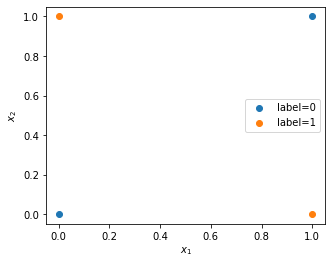

In [4]:
plt.figure(figsize=(5, 4))
plt.scatter(data2[classes2 == 0][:, 0], data2[classes2 == 0][:, 1])
plt.scatter(data2[classes2 == 1][:, 0], data2[classes2 == 1][:, 1])
plt.legend(['label=0', 'label=1'])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In this training set, its labels are composed of two 0s and two 1s, and its entroy is 1. No matter how it is split, its candidate split consists of two subsets, both of which have two data points, the labels of the two data points have a 1 and a 0. So the entropy of any candidate split set is still 1. Any candidate split of it has zero gain ratio. So it is a leaf node.

### 3.

In [5]:
row_data = open('Druns.txt').read().split('\n')[:-1]
data3 = np.array([[float(line.split()[0]), float(line.split()[1])] for line in row_data])
classes3 = np.array([int(line.split()[2]) for line in row_data])

results = []
zero_info_gain_rate = []
for feature in [0, 1]:
    if len(set(data3[:, feature])) > 1:
        for c in set(data3[:, feature]):
            if c == min(data3[:, feature]):
                continue
            info_gain_ratio, info_gain, dataL, dataR, classesL, classesR = entropy_gain(data3, feature, c, classes3)
            info_gain_ratio = info_gain_ratio.round(5)
            entropyL = entropy(classesL)
            entropyR = entropy(classesR)
            if (entropyL + entropyR) == 0:
                zero_info_gain_rate.append([f'x{feature}', c, info_gain])
            results.append([f'x{feature + 1}', c, info_gain_ratio])
            
df3 = pd.DataFrame(results)
df3.columns = ['split feature', 'threshold', 'information gain ratio']
df3

,split feature,threshold,information gain ratio
0,x1,0.1,0.10052
1,x2,0.0,0.01106
2,x2,1.0,0.00141
3,x2,2.0,0.00031
4,x2,3.0,0.00472
5,x2,4.0,0.01429
6,x2,5.0,0.03041
7,x2,6.0,0.05769
8,x2,7.0,0.01106
9,x2,8.0,0.05465


In [6]:
zero_info_gain_rate

[]

All candidate cuts and their information gain ratio are shown in the table below.

There is no candidate whoes entropy is zero.

Choose $x0$ and $c=0.1$ in the first section to split the data, As the information gain ratio of it is the largest.

### 4.

In [7]:
row_data4 = open('D3leaves.txt').read().split('\n')[:-1]
data4 = np.array([[float(line.split()[0]), float(line.split()[1])] for line in row_data4])
classes4 = np.array([int(line.split()[2]) for line in row_data4])

tree4 = split(data4, classes4)
print(tree4)

((',x1<10.0,x2<3.0: predict=0', ',x1<10.0,x2>=3.0: predict=1'), ',x1>=10.0: predict=1')


**The tree:**
<img src="./Q4_tree.jpg" width="50%">

**Logic rules:**

if $x_1<10, x_2<3$, predict $label = 0$,

if $x_1<10, x_2\ge3$, predict $label = 1$,

if $x_1\ge10$, predict $label = 1$


### 5.

##### 1)

In [8]:
# display the tree in a formatted string
def format_tree(tree, i=0):
    if type(tree) == str:
        level = len(tree.split(',')) - 1
        print('\t' * level + '\u0332'.join(tree.split(':')[-1][1:]))
    else:
        rule0 = get_final_rule(tree[0])
        rule1 = get_final_rule(tree[1])
        decision_boundries.append(rule0.split(':')[0].split(',')[i+1].split('<'))
        print('\t' * i + rule0.split(':')[0].split(',')[i+1])
        format_tree(tree[0], i+1)
        print('\t' * i + rule1.split(':')[0].split(',')[i+1])
        format_tree(tree[1], i+1)

def get_final_rule(tree):
    if type(tree) == str:
        return tree
    else:
        return get_final_rule(tree[0])
    

In [9]:
row_data5_1 = open('D1.txt').read().split('\n')[:-1]
data5_1 = np.array([[float(line.split()[0]), float(line.split()[1])] for line in row_data5_1])
classes5_1 = np.array([int(line.split()[2]) for line in row_data5_1])

tree5_1 = split(data5_1, classes5_1)


**The tree of D1.txt is:**

In [10]:
global decision_boundries
decision_boundries = []
format_tree(tree5_1)

x2<0.201829
	p̲r̲e̲d̲i̲c̲t̲=̲0
x2>=0.201829
	p̲r̲e̲d̲i̲c̲t̲=̲1


In [11]:
db1 = copy.deepcopy(decision_boundries)

##### 2)

The  decision boundary is $x_2 = 0.201829$, if $x_2\lt0.201829$, predict $label = 0$, if $x_2\geq0.201829$, predict $label = 1$.

##### 3)

In [12]:
row_data5_2 = open('D2.txt').read().split('\n')[:-1]
data5_2 = np.array([[float(line.split()[0]), float(line.split()[1])] for line in row_data5_2])
classes5_2 = np.array([int(line.split()[2]) for line in row_data5_2])

tree5_2 = split(data5_2, classes5_2)

**The tree of D2.txt is:**

In [13]:
decision_boundries = []
format_tree(tree5_2)

x1<0.533076
	x2<0.639018
		x2<0.534979
			p̲r̲e̲d̲i̲c̲t̲=̲0
		x2>=0.534979
			x1<0.409972
				p̲r̲e̲d̲i̲c̲t̲=̲0
			x1>=0.409972
				x1<0.426073
					x1<0.417579
						p̲r̲e̲d̲i̲c̲t̲=̲1
					x1>=0.417579
						p̲r̲e̲d̲i̲c̲t̲=̲0
				x1>=0.426073
					p̲r̲e̲d̲i̲c̲t̲=̲1
	x2>=0.639018
		x1<0.111076
			x2<0.964767
				p̲r̲e̲d̲i̲c̲t̲=̲0
			x2>=0.964767
				p̲r̲e̲d̲i̲c̲t̲=̲1
		x1>=0.111076
			x2<0.861
				x1<0.33046
					x2<0.745406
						p̲r̲e̲d̲i̲c̲t̲=̲0
					x2>=0.745406
						x1<0.254049
							x1<0.191915
								p̲r̲e̲d̲i̲c̲t̲=̲0
							x1>=0.191915
								x2<0.792752
									p̲r̲e̲d̲i̲c̲t̲=̲0
								x2>=0.792752
									p̲r̲e̲d̲i̲c̲t̲=̲1
						x1>=0.254049
							p̲r̲e̲d̲i̲c̲t̲=̲1
				x1>=0.33046
					p̲r̲e̲d̲i̲c̲t̲=̲1
			x2>=0.861
				p̲r̲e̲d̲i̲c̲t̲=̲1
x1>=0.533076
	x2<0.383738
		x1<0.761423
			x2<0.301105
				p̲r̲e̲d̲i̲c̲t̲=̲0
			x2>=0.301105
				x1<0.66337
					p̲r̲e̲d̲i̲c̲t̲=̲0
				x1>=0.66337
					p̲r̲e̲d̲i̲c̲t̲=̲1
		x1>=0.761423
			x2<0.191206
				x1<0.90482
					x2<0.169053
	

In [14]:
db2 = copy.deepcopy(decision_boundries)

##### 4)

The decision boundries of the tree of D2.txt are:
    
$x_1 = 0.533076$, $x_2 = 0.639018$, $x_2 = 0.534979$,

$x_1 = 0.409972$, $x_1 = 0.426073$, $x_1 = 0.417579$,

$x_1 = 0.111076$, $x_1 = 0.111076$, $x_2 = 0.964767$,

$1_2 = 0.861$, $x_1 = 0.33046$, $x_2 = 0.745406$,

$x_1 = 0.254049$, $x_1 = 0.191915$, $x_2 = 0.792752$,

$x_2 = 0.383738$, $x_1 = 0.761423$, $x_2 = 0.301105$, 

$x_1 = 0.66337$, $x_2=0.191206$, $x_1=0.90482$,

$x_2=0.169053, x_1=0.850316$, $x_2=0.037708$,

$x_1=0.930371$, $x_1=0.927522$, $x_1=0.550364$,

$x_2 = 0.474971$.


The logical of the tree is shown in the formatted text above, and indentation at the same level represents a split. Data is classified by the indentation level and from left to right.

It is **not easy** to interpret the tree without visualization.

### 6.

**D1.txt:**

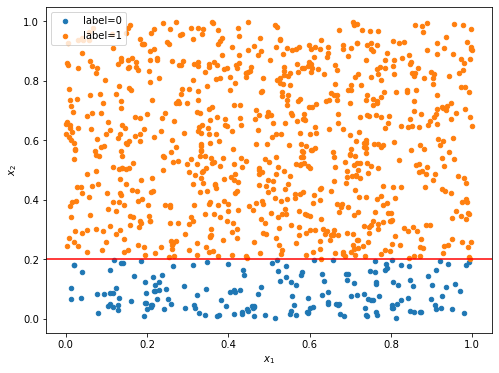

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(data5_1[classes5_1 == 0][:, 0], data5_1[classes5_1 == 0][:, 1], s = 20)
plt.scatter(data5_1[classes5_1 == 1][:, 0], data5_1[classes5_1 == 1][:, 1], s = 20)
plt.legend(['label=0', 'label=1'])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
for db in db1:
    if db[0] == 'x1':
        plt.axvline(float(db[1]), color = 'red')
    else:
        plt.axhline(float(db[1]), color = 'red')
plt.show()

#### D2.txt:

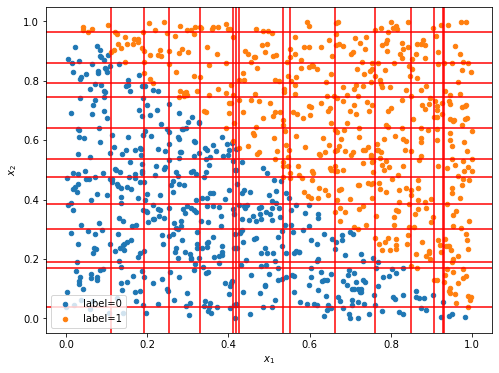

In [16]:
data5_2
plt.figure(figsize=(8, 6))
plt.scatter(data5_2[classes5_2 == 0][:, 0], data5_2[classes5_2 == 0][:, 1], s = 20)
plt.scatter(data5_2[classes5_2 == 1][:, 0], data5_2[classes5_2 == 1][:, 1], s = 20)
plt.legend(['label=0', 'label=1'])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
for db in db2:
    if db[0] == 'x1':
        plt.axvline(float(db[1]), color = 'red')
    else:
        plt.axhline(float(db[1]), color = 'red')
plt.show()

**Discussion:**

In decision tree classification of two-dimensional continuous variables, it is assumed that the data can be classified according to horizontal or vertical decision boundaries. In the data of d1.txt, the original data is divided into two parts according to **a horizontal line**, so a horizontal decision boundary can classify the data well. But in the data of d2, the original data cannot be divided into two parts by a horizontal or vertical line, which is separated by **a slash**, so many horizontal and vertical lines are needed to approach this slash. This is why the decision boundaries for these two data are different.

### 7.

In [17]:
import random
random.seed(1)
row_data7 = open('Dbig.txt').read().split('\n')[:-1]
data7 = np.array([[float(line.split()[0]), float(line.split()[1])] for line in row_data7])
classes7 = np.array([int(line.split()[2]) for line in row_data7])
index = list(range(len(data7)))
random.shuffle(index)
data7 = data7[index]
classes7 = classes7[index]

ns = [32, 128, 512, 2048, 8192]


In [18]:
#def predict(tree, point):
#    x1, x2 = point

def get_rules(tree, rules = []):
    if type(tree) == str:
        return [tree]
    else:
        return rules + get_rules(tree[0]) + get_rules(tree[1])

rules = get_rules(tree5_2)

def check_rule(rule, point):
    x1, x2 = point
    checks = rule.split(':')[0].split(',')[1:]
    result = True
    for check in checks:
        #print(check)
        if 'x1' in check:
            number = x1
        else:
            number = x2
        if '<' in check:
            if number >= float(check.split('<')[1]):
                result = False
                break
        else:
            if number < float(check.split('>=')[1]):
                result = False
                break
    return result, int(rule[-1])



def predict(tree, data):
    rules = get_rules(tree)
    
    result = [[check_rule(rule, tuple(point)) for rule in rules]for point in data]
    result = [list(filter(lambda x:x[0]==True, item))[0][1] for item in result]
    return np.array(result)
    


In [19]:
result7 = []
dbs = []
tree7s = []
for s in ns:
    train_data = data7[:s, :]
    train_classes = classes7[:s]
    #print(train_data.shape, train_classes.shape)
    test_data = data7[s:, :]
    test_classes = classes7[s:]
    #print(train_data.shape, train_classes.shape)
    tree7 = split(train_data, train_classes)
    tree7s.append(tree7)
    rules = get_rules(tree7)
    #print(rules)
    decision_boundries = []
    format_tree(tree7)
    db = copy.deepcopy(decision_boundries)
    dbs.append(db)
    n = len(decision_boundries) + len(rules)
    prediction = predict(tree7, test_data)
    error = 1 - sum(test_classes == prediction) / len(test_data)
    result7.append([n, error])
    
    


x1<1.014542
	x2<-0.508494
		p̲r̲e̲d̲i̲c̲t̲=̲1
	x2>=-0.508494
		x2<1.249926
			x1<-0.915899
				p̲r̲e̲d̲i̲c̲t̲=̲1
			x1>=-0.915899
				p̲r̲e̲d̲i̲c̲t̲=̲0
		x2>=1.249926
			p̲r̲e̲d̲i̲c̲t̲=̲1
x1>=1.014542
	p̲r̲e̲d̲i̲c̲t̲=̲1
x2<-0.670203
	p̲r̲e̲d̲i̲c̲t̲=̲1
x2>=-0.670203
	x1<1.053306
		x1<-0.996403
			p̲r̲e̲d̲i̲c̲t̲=̲1
		x1>=-0.996403
			x2<1.249926
				x2<-0.173235
					x1<0.856848
						x1<-0.565978
							x1<-0.716397
								p̲r̲e̲d̲i̲c̲t̲=̲1
							x1>=-0.716397
								x1<-0.635441
									p̲r̲e̲d̲i̲c̲t̲=̲0
								x1>=-0.635441
									p̲r̲e̲d̲i̲c̲t̲=̲1
						x1>=-0.565978
							p̲r̲e̲d̲i̲c̲t̲=̲0
					x1>=0.856848
						p̲r̲e̲d̲i̲c̲t̲=̲1
				x2>=-0.173235
					x2<1.1047
						p̲r̲e̲d̲i̲c̲t̲=̲0
					x2>=1.1047
						x1<0.918432
							p̲r̲e̲d̲i̲c̲t̲=̲0
						x1>=0.918432
							p̲r̲e̲d̲i̲c̲t̲=̲1
			x2>=1.249926
				p̲r̲e̲d̲i̲c̲t̲=̲1
	x1>=1.053306
		p̲r̲e̲d̲i̲c̲t̲=̲1
x2<-0.70481
	x2<-0.850811
		p̲r̲e̲d̲i̲c̲t̲=̲1
	x2>=-0.850811
		x2<-0.8504
			p̲r̲e̲d̲i̲c̲t̲=̲0
		x2>=-0.8504
			x2<-0.

#### 1)

In [20]:
df7 = pd.DataFrame(result7)
df7.columns = ['n', 'error']
df7

,n,error
0,9,0.091192
1,23,0.067362
2,45,0.048482
3,101,0.026534
4,211,0.018252


#### 2)

<AxesSubplot:title={'center':'error vs the number of nodes in the tree'}, xlabel='$n$', ylabel='$err_n$'>

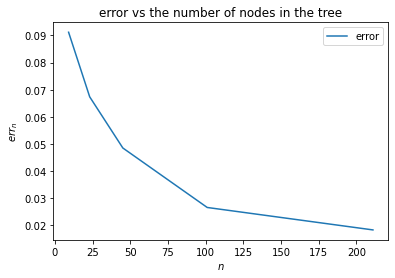

In [21]:
df7.plot(x='n', y='error', xlabel = '$n$', ylabel = '$err_n$',  
           title = 'error vs the number of nodes in the tree')

#### 3)

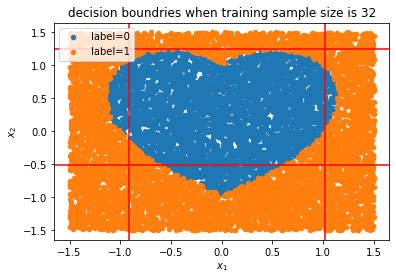

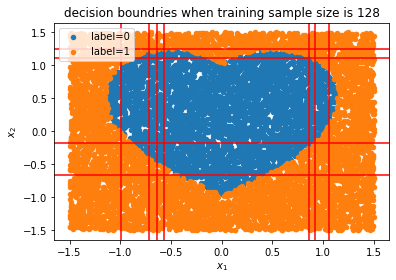

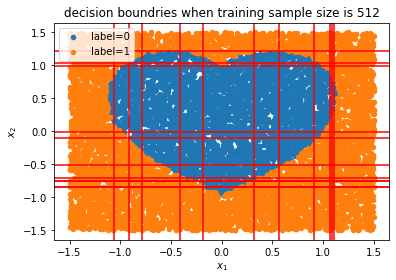

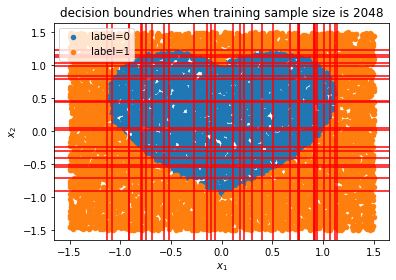

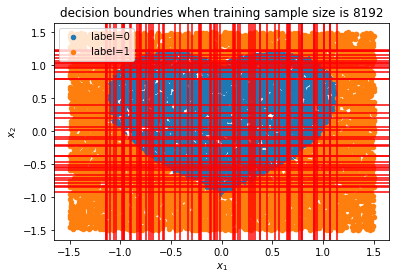

In [33]:
for i in range(len(dbs)):
    db3 = dbs[i]
    plt.figure(figsize=(6, 4))
    plt.scatter(data7[classes7 == 0][:, 0], data7[classes7 == 0][:, 1], s = 20)
    plt.scatter(data7[classes7 == 1][:, 0], data7[classes7 == 1][:, 1], s = 20)
    plt.legend(['label=0', 'label=1'])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    for db in db3:
        if db[0] == 'x1':
            plt.axvline(float(db[1]), color = 'red')
        else:
            plt.axhline(float(db[1]), color = 'red')
    plt.title('decision boundries when training sample size is {}'.format(ns[i]))
    plt.show()

## 3 sklearn

In [24]:
from sklearn.tree import DecisionTreeClassifier

result_s = []
for s in ns:
    train_data = data7[:s, :]
    train_classes = classes7[:s]
    #print(train_data.shape, train_classes.shape)
    test_data = data7[s:, :]
    test_classes = classes7[s:]
    #print(train_data.shape, train_classes.shape)
    tree8 = DecisionTreeClassifier(random_state = 1)
    tree8.fit(train_data, train_classes)
    prediction = tree8.predict(test_data)
    n = tree8.tree_.node_count 
    error = 1 - sum(test_classes == prediction) / len(test_data)
    
    result_s.append([n, error])

result_s

[[11, 0.1949237560192616],
 [25, 0.08893841166936789],
 [57, 0.05269814502529513],
 [129, 0.027791750503018076],
 [221, 0.01603982300884954]]

#### 1)

In [25]:
df_s = pd.DataFrame(result_s)
df_s.columns = ['n', 'error']
df_s


,n,error
0,11,0.194924
1,25,0.088938
2,57,0.052698
3,129,0.027792
4,221,0.016040


#### 2)

<AxesSubplot:title={'center':'error vs the number of nodes in the tree'}, xlabel='$n$', ylabel='$err_n$'>

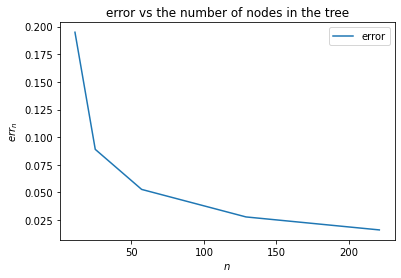

In [26]:
df_s.plot(x='n', y='error', xlabel = '$n$', ylabel = '$err_n$',  
           title = 'error vs the number of nodes in the tree')

## 4 Lagrange Interpolation

In [28]:
from random import uniform
random.seed(7)
a, b = 0, 1
x_train = np.array([uniform(a,b) for _ in range(100)])
y_train = np.sin(x_train)
x_test = np.array([uniform(a,b) for _ in range(100)])
y_test = np.sin(x_test)

In [29]:
from scipy.interpolate  import lagrange
from numpy.polynomial.polynomial import Polynomial

f = lagrange(x_train, y_train)
RMSE_train = (sum(((Polynomial(f.coef[::-1])(x_train) - y_train)**2))/100)**0.5 
RMSE_test = (sum(((Polynomial(f.coef[::-1])(x_test) - y_test)**2))/100)**0.5 
print('RMSE of the train set:', RMSE_train)
print('RMSE of the test set:', RMSE_test)

RMSE of the train set: 3.2787623341942804e+71
RMSE of the test set: 4.101526474671897e+71


The $RMSE$ of the model on the train data is $3.279e+71$, The $RMSE$ of the model on the train data is $4.102e+71$, Their values are very large, and the lagrange interpolation method is not suitable for models with too many points (usually the number of points should be less than $20$)

In [30]:
stds = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5]
RMSE_trains = []
RMSE_tests = []
np.random.seed(1)
for std in stds:
    noise = np.random.randn(100) * std
    x_train_noise = x_train + noise
    f = lagrange(x_train_noise, y_train)

    RMSE_train = (sum(((Polynomial(f.coef[::-1])(x_train) - y_train)**2))/100)**0.5 
    RMSE_trains.append(RMSE_train)
    RMSE_test = (sum(((Polynomial(f.coef[::-1])(x_test) - y_test)**2))/100)**0.5 
    RMSE_tests.append(RMSE_test)
    print('RMSE of the train set:', RMSE_train)
    print('RMSE of the test set:', RMSE_test)

RMSE of the train set: 2.1610495353585282e+71
RMSE of the test set: 2.6819227568310003e+71
RMSE of the train set: 9.010392232363055e+72
RMSE of the test set: 1.1266126337117418e+73
RMSE of the train set: 1.979386880669432e+70
RMSE of the test set: 2.4344027824619165e+70
RMSE of the train set: 1.323361128977407e+76
RMSE of the test set: 1.6514532762205078e+76
RMSE of the train set: 4.5767048164625225e+69
RMSE of the test set: 5.598226664032255e+69
RMSE of the train set: 9.350901250671204e+44
RMSE of the test set: 1.1979268743865183e+45
RMSE of the train set: 3.2400731065398076e+26
RMSE of the test set: 3.224436426010251e+26
RMSE of the train set: 16145338.601988351
RMSE of the test set: 20325887.60831657
RMSE of the train set: 15322.24199166167
RMSE of the test set: 14497.524029298427


Text(0.5, 1.0, 'RMSE on the train data and test data change with the std of noise')

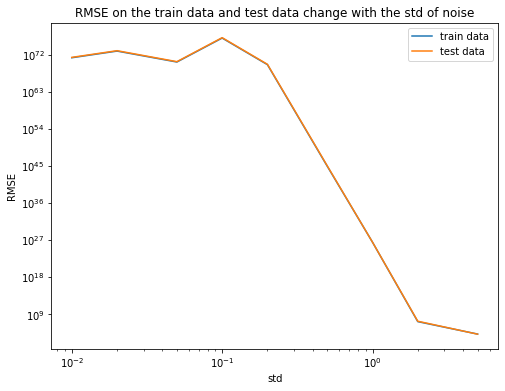

In [31]:
plt.figure(figsize = (8, 6))
plt.plot(stds, RMSE_trains)
plt.plot(stds, RMSE_tests)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('std')
plt.ylabel('RMSE')
plt.legend(['train data', 'test data'])
plt.title('RMSE on the train data and test data change with the std of noise')

**Finding:**

As the std of noise increases, the RMSE on the training set and test set becomes smaller.